In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from reductions import CNN_GCNN, EENTh, DROP

from knn import callKNN
from svm import callSVM

In [2]:
def load_ds(name, num_folds=10):

    folds_data = []

    for fold in range(num_folds):

        train_file = f'{name}_csv/{name}.fold.00000{fold}.train.csv'

        df_train = pd.read_csv(train_file)

        X_train = df_train.iloc[:, :-1]
        y_train = df_train.iloc[:, -1]

        folds_data.append((X_train, y_train,))

    return folds_data     

def load_ds_train_reductions(name, method, num_folds=10):

    folds_data = []

    for fold in range(num_folds):

        train_file = f'{name}_csv/{name}.fold.00000{fold}_{method}.train.csv'
        test_file = f'{name}_csv/{name}.fold.00000{fold}.test.csv'

        df_train = pd.read_csv(train_file)
        df_test = pd.read_csv(test_file)

        X_train = df_train.iloc[:, :-1]
        y_train = df_train.iloc[:, -1]
        X_test = df_test.iloc[:, :-1]
        y_test = df_test.iloc[:, -1]

        folds_data.append((X_train, X_test, y_train, y_test))

    return folds_data   

In [3]:
def store_ds(name, fold, method, prototypes_X, prototypes_y, X_train, y_train):
    X_train = pd.DataFrame(prototypes_X, columns = X_train.columns)
    y_train = pd.Series(prototypes_y, name = y_train.name, dtype=int)
    df = pd.concat((X_train, y_train), axis=1)
    df.to_csv(f'{name}_csv/{name}.fold.00000{fold}_{method}.train.csv', index=False)

In [4]:
def plot_grid(X_train, y_train, ax, title):
    ax.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
    ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title(title)
    ax.legend()


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 8, n_samples_fit = 7, n_samples = 1

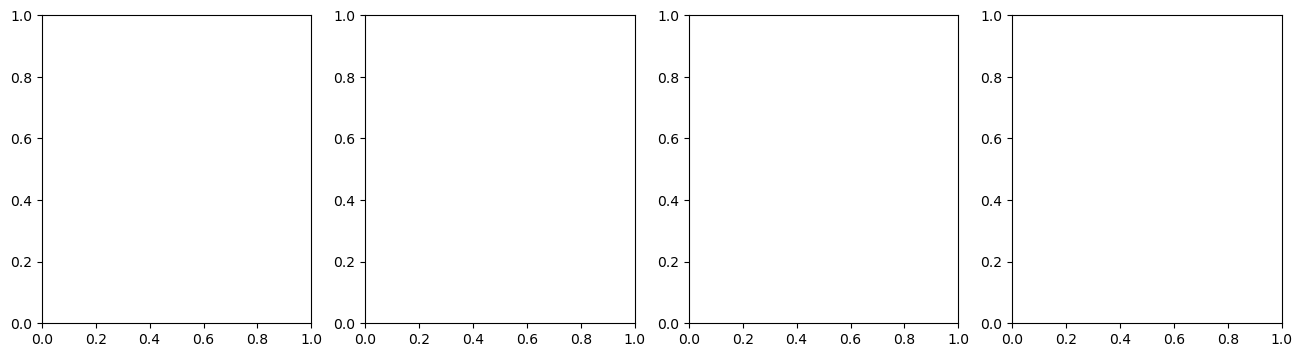

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
datasets = ['sick'] #'grid'
titles = ['Original', 'CNN', 'DROP', 'EENTh']

# Loop through datasets and apply different methods
for ds in datasets:
    for i, (X_train, y_train) in enumerate(load_ds(ds)):

        """# Original dataset plot
        if ds == 'grid' and i == 0:
            plot_grid(X_train.values, y_train.values, ax[0], f'{ds} - {titles[0]}')

        # CNN
        cnn = CNN_GCNN(rho=0)
        prototypes_X, prototypes_y = cnn.fit(X_train.values, y_train.values)
        if ds == 'grid' and i == 0:
            plot_grid(prototypes_X, prototypes_y, ax[1], f'{ds} - {titles[1]}')
        store_ds(ds, i, 'CNN', prototypes_X, prototypes_y, X_train, y_train)

        # EENTh
        eetnh = EENTh(k=3, threshold=0.99)
        prototypes_X, prototypes_y = eetnh.fit(X_train.values, y_train.values)
        if ds == 'grid' and i == 0:
            plot_grid(prototypes_X, prototypes_y, ax[2], f'{ds} - {titles[3]}')
        store_ds(ds, i, 'EENTh', prototypes_X, prototypes_y, X_train, y_train)"""

        # DROP
        drop = DROP(drop_type='drop3', k=7)
        prototypes_X, prototypes_y = drop.fit(X_train.values, y_train.values)
        if ds == 'grid' and i == 0:
            plot_grid(prototypes_X, prototypes_y, ax[3], f'{ds} - {titles[2]}')
        store_ds(ds, i, 'DROP', prototypes_X, prototypes_y, X_train, y_train)
    

In [14]:
dataset_names = ['sick', 'grid']
methods = ['svm', 'knn']
best_params = {'grid': {
                    'knn': {
                        'K': 7,
                        'Distance': 'minkowski2',
                        'Voting scheme': 'Majority_class',
                        'Weight scheme': 'Mutual_classifier'},
                    'svm': 
                        {'Kernel': 'rbf'}}, 
                'sick': {
                    'knn':{
                        'K': 7, 
                        'Distance': 'HEOM', 
                        'Voting scheme': 'Majority_class', 
                        'Weight scheme': 'Mutual_classifier'},
                    'svm': 
                        {'Kernel': 'rbf'}}}

for ds_name in dataset_names:
    for method in methods:
        for reduction in ['CNN', 'DROP', 'EENTh']:
            for i, (X_train, X_test, y_train, y_test) in enumerate(load_ds_train_reductions(ds_name, reduction)):
                print(i, reduction)
                if method == 'knn':
                    results = callKNN(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,  
                                    dist_func=best_params[ds_name][method]['Distance'], 
                                    voting_scheme=best_params[ds_name][method]['Voting scheme'], 
                                    weight_scheme=best_params[ds_name][method]['Weight scheme'], 
                                    k=best_params[ds_name][method]['K'])    
                elif method == 'svm':
                    results = callSVM(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                                    kernel=best_params[ds_name][method]['Kernel'])
                results.to_csv(f'results_{method}_reduced/results_{ds_name}_{i}_{reduction}.csv', index=False)

0 CNN
1 CNN
2 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3 CNN
4 CNN
5 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6 CNN
7 CNN
8 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


9 CNN
0 DROP


ValueError: The number of classes has to be greater than one; got 1 class